In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pickle



import warnings 
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset3/main/Salaries.csv")

In [4]:
data

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [5]:
data.shape

(397, 6)

In [7]:
data.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


In [6]:
data.describe()

,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


In [8]:
# droping Unwanted columns
data=data.drop(columns=['rank','discipline','sex'])
data.head()

,yrs.since.phd,yrs.service,salary
0,19,18,139750
1,20,16,173200
2,4,3,79750
3,45,39,115000
4,40,41,141500


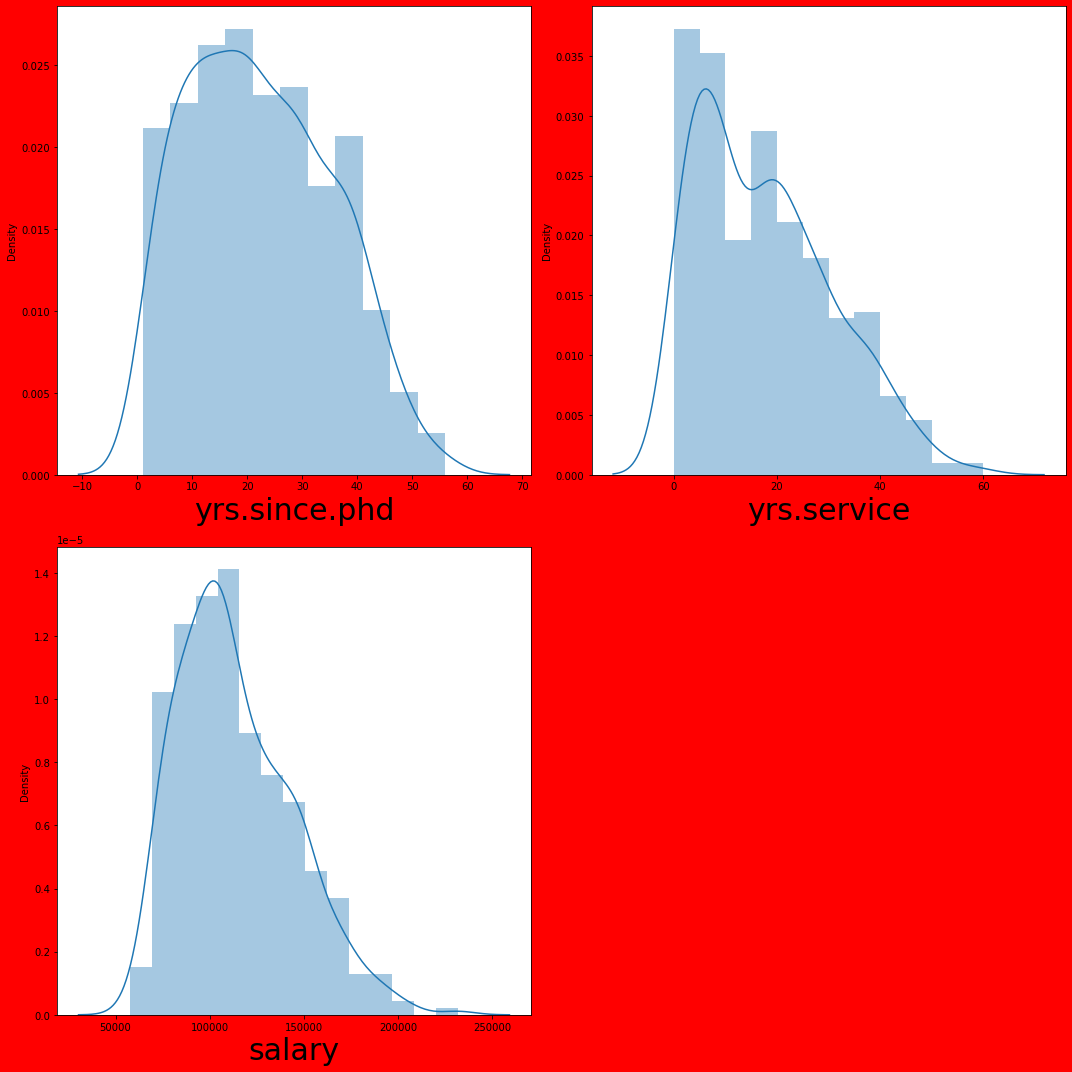

In [14]:
plt.figure(figsize=(15,15), facecolor='red')
plotnumber = 1

for column in data:
    if plotnumber<=3:
        ax = plt.subplot(2,2,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=30)
        
    plotnumber+=1
plt.tight_layout()

In [15]:
#divide dataset into feature and label
y = data['salary']
X = data.drop(columns=['salary'])

In [16]:
y

0      139750
1      173200
2       79750
3      115000
4      141500
        ...  
392    103106
393    150564
394    101738
395     95329
396     81035
Name: salary, Length: 397, dtype: int64

In [17]:
X

,yrs.since.phd,yrs.service
0,19,18
1,20,16
2,4,3
3,45,39
4,40,41
...,...,...
392,33,30
393,31,19
394,42,25
395,25,15


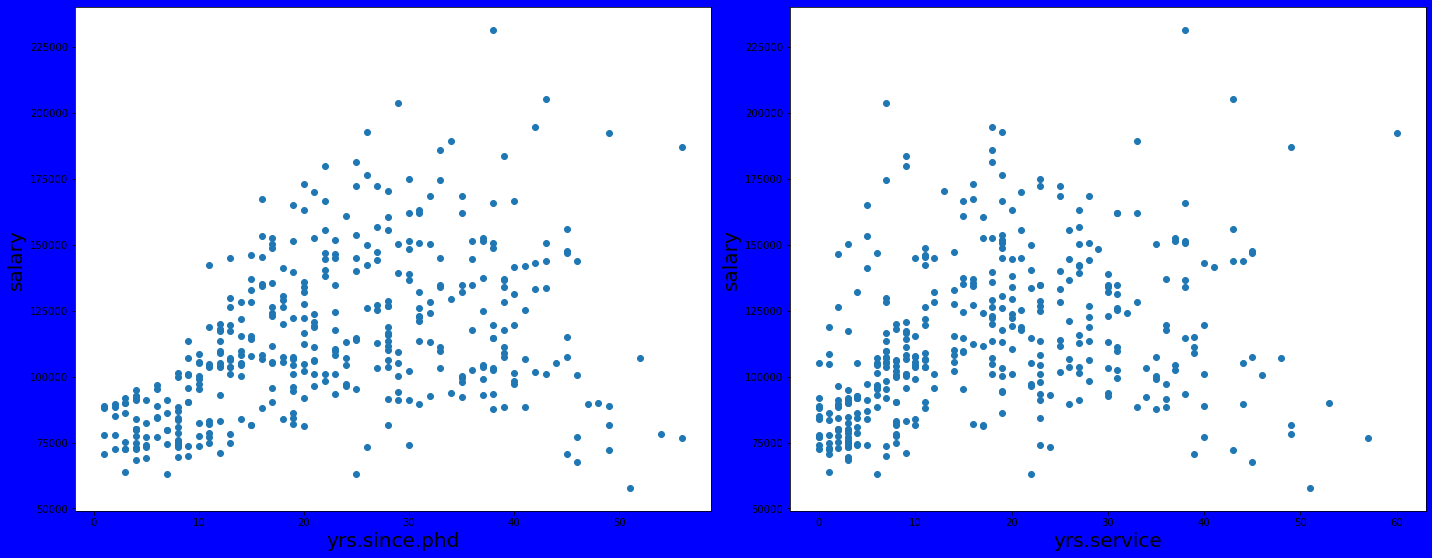

In [18]:
plt.figure(figsize=(20,15), facecolor='blue')
plotnumber = 1

for column in X:
    if plotnumber<=3:
        ax = plt.subplot(2,2,plotnumber)
        plt.scatter(X[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('salary',fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

In [19]:
#data scaling formula z=(x-mean)/std
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [20]:
X_scaled

array([[-0.25754973,  0.02966908],
       [-0.17985426, -0.12429986],
       [-1.42298184, -1.12509795],
       [ 1.76253259,  1.64634292],
       [ 1.37405522,  1.80031186],
       [-1.26759089, -0.89414455],
       [ 0.59710048,  0.41459142],
       [ 1.76253259,  2.10824973],
       [-0.10215878,  0.18363801],
       [-0.33524521,  0.02966908],
       [-0.80141805, -0.74017561],
       [-1.18989542, -1.20208242],
       [-1.65606826, -1.27906689],
       [-1.57837279, -1.35605136],
       [-0.17985426,  0.02966908],
       [-0.80141805, -1.12509795],
       [-0.25754973,  0.18363801],
       [ 1.21866427,  1.26142058],
       [ 1.1409688 ,  0.41459142],
       [ 1.29635975,  1.41538951],
       [ 0.67479596,  0.64554483],
       [ 1.06327332,  1.03046717],
       [ 0.90788238,  0.9534827 ],
       [ 0.13092764,  0.10665355],
       [-0.72372258, -0.74017561],
       [-0.10215878, -0.74017561],
       [ 0.98557785,  0.41459142],
       [-1.34528637, -1.12509795],
       [-0.87911352,

In [21]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.25,random_state=376)
y_train.head()

343    162150
391    151292
102    153303
152    111168
251    102000
Name: salary, dtype: int64

In [22]:
#model instatning and training
regression = LinearRegression()
regression.fit(x_train, y_train)

LinearRegression()

In [23]:
# predict the happiness score from features
data.tail(2)

,yrs.since.phd,yrs.service,salary
395,25,15,95329
396,8,4,81035


In [24]:
#we have already fit the scaler,you can transform the data
print('salary : ',regression.predict(scaler.transform([[8,4]])))

salary :  [99679.49775021]


# save file for future prediction

In [25]:
# saving the model to the local file system
pickle.dump(regression, open('regr_model','wb'))

In [26]:
# predicting using the saved model
loaded_model = pickle.load(open('regr_model','rb'))
a=loaded_model.predict(scaler.transform([[6,2]]))

In [27]:
a

array([97797.05620521])

In [28]:
scaler.transform([[6,2]])

array([[-1.26759089, -1.20208242]])

In [29]:
# adjusted r2 score
regression.score(x_train,y_train)

0.18741998051819353

In [30]:
#check how well  model to fit data...
regression.score(x_test,y_test)

0.1852789637310165

# ploting and visualization

In [31]:
y_pred = regression.predict(x_test)

In [32]:
y_pred

array([111661.4331608 , 113543.87470579, 118530.13798061, 126313.83879251,
       115373.86668995, 113263.71529347, 133944.34750804,  93778.23848331,
        93371.11175503,  98611.30966176, 118604.65573572, 102376.19275175,
        92837.01771081, 121200.60820174, 122877.40808953, 125779.74474829,
       130485.84861078, 100213.59179443, 114712.80532978,  95380.52061598,
       107896.5500708 , 118376.94588424, 125092.45860769,  92963.98502676,
       116621.47165519, 121327.57551769,  97262.96216098, 103317.41352425,
       141093.21174018, 134377.69901673, 109905.95893175, 111228.0816521 ,
       134325.24945589, 125779.74474829, 119699.0686046 , 113797.8093377 ,
       143509.7473294 , 126720.96552079, 106955.3292983 , 114839.77264573,
       130485.84861078, 106955.3292983 ,  94846.42657176, 116367.53702329,
       127255.05956501,  93778.23848331, 103597.57293658, 103851.50756848,
       129058.82676875, 119926.77845608,  99679.49775021, 121988.63687787,
       101969.06602348, 1

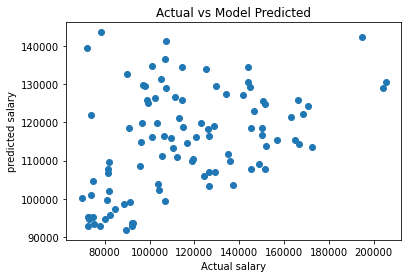

In [33]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual salary')
plt.ylabel('predicted salary')
plt.title('Actual vs Model Predicted')
plt.show()